In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load the data from the assets folder

rain_data = pd.read_csv('../assets/rain_data.csv')
print(f'Shape of the data: {rain_data.shape}')
rain_data.head()

Shape of the data: (67021, 23)


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
1,2008-12-06,Albury,14.6,29.7,0.2,NaN,NaN,WNW,56.0,W,...,55.0,23.0,1009.2,1005.4,NaN,NaN,20.6,28.9,No,No
2,2008-12-09,Albury,9.7,31.9,0.0,NaN,NaN,NNW,80.0,SE,...,42.0,9.0,1008.9,1003.6,NaN,NaN,18.3,30.2,No,Yes
3,2008-12-11,Albury,13.4,30.4,0.0,NaN,NaN,N,30.0,SSE,...,48.0,22.0,1011.8,1008.7,NaN,NaN,20.4,28.8,No,Yes
4,2008-12-12,Albury,15.9,21.7,2.2,NaN,NaN,NNE,31.0,NE,...,89.0,91.0,1010.5,1004.2,8.0,8.0,15.9,17.0,Yes,Yes


# Preprocessing

In [3]:
print(rain_data.dtypes)
rain_data.describe()

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object


,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,65864.000000,65940.000000,64271.000000,37591.000000,34831.000000,61576.000000,65971.000000,65328.000000,65257.000000,64388.000000,59750.000000,59761.000000,41303.000000,40071.000000,65689.000000,64811.000000
mean,12.552091,22.480866,3.669512,5.122383,6.514499,42.142150,14.634764,19.187194,72.074781,57.521433,1016.524147,1014.237604,5.053870,5.184148,16.888700,20.822340
std,6.371143,7.108686,10.981571,3.950017,3.932475,14.638665,9.227585,9.171806,18.481003,21.741282,7.343975,7.283068,2.778949,2.620094,6.427827,6.931696
min,-8.200000,-4.800000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000
25%,8.000000,17.200000,0.000000,2.400000,3.200000,31.000000,7.000000,13.000000,61.000000,42.000000,1011.700000,1009.300000,2.000000,3.000000,12.200000,15.800000
50%,12.300000,21.800000,0.000000,4.400000,6.800000,41.000000,13.000000,19.000000,74.000000,58.000000,1016.500000,1014.200000,6.000000,6.000000,16.500000,20.100000
75%,17.200000,27.400000,2.200000,7.000000,9.900000,50.000000,20.000000,24.000000,87.000000,73.000000,1021.500000,1019.200000,7.000000,7.000000,21.400000,25.500000
max,33.900000,47.300000,371.000000,77.300000,14.500000,135.000000,87.000000,87.000000,100.000000,100.000000,1040.300000,1038.500000,8.000000,8.000000,39.000000,46.700000


In [4]:
# Create new variable from the date column

rain_data['Date'] = pd.to_datetime(rain_data['Date'])
rain_data['Month'] = rain_data['Date'].dt.month
rain_data['Day'] = rain_data['Date'].dt.day
rain_data['Year'] = rain_data['Date'].dt.year
rain_data.drop('Date', axis=1, inplace=True)

In [5]:
# Create 'Temp_difference' - difference between the maximum and minimum temperature of the day
rain_data['Temp_difference'] = rain_data['MaxTemp'] - rain_data['MinTemp']

# Create 'Humidity_difference' - difference between morning and afternoon humidity
rain_data['Humidity_difference'] = rain_data['Humidity9am'] - rain_data['Humidity3pm']

# Create 'Pressure_difference' - difference between morning and afternoon pressure
rain_data['Pressure_difference'] = rain_data['Pressure9am'] - rain_data['Pressure3pm']

# Create 'WindSpeed_difference' - difference between morning and afternoon wind speed
rain_data['WindSpeed_difference'] = rain_data['WindSpeed9am'] - rain_data['WindSpeed3pm']

"""# Create 'TotalSunshine' - potential sunshine duration up to the observed moment
# Assuming that 'Sunshine' is the observed sunshine and we need to consider days without observation
rain_data['TotalSunshine'] = rain_data['Sunshine'].fillna(0) * (rain_data['DayOfYear'] / 365)

# Create 'DayOfYear' from 'Month', 'Day', 'Year' to calculate 'TotalSunshine'
rain_data['DayOfYear'] = pd.to_datetime(rain_data[['Year', 'Month', 'Day']]).dt.dayofyear"""

"""# Create 'IsRainyDay' - binary variable if it rained today
rain_data['IsRainyDay'] = (rain_data['Rainfall'] > 0).astype(int)"""

# Add a print statement to show the shape of the DataFrame and the newly added columns
print("Shape of the data:", rain_data.shape)
print("Newly added columns:", [col for col in rain_data.columns if 'difference' in col or 'TotalSunshine' in col or 'IsRainyDay' in col])


Shape of the data: (67021, 29)
Newly added columns: ['Temp_difference', 'Humidity_difference', 'Pressure_difference', 'WindSpeed_difference']


# Missing values

,missing_values,percent_missing %,data type
Location,0,0.000000,object
MinTemp,1157,1.726325,float64
MaxTemp,1081,1.612927,float64
Rainfall,2750,4.103192,float64
Evaporation,29430,43.911610,float64
Sunshine,32190,48.029722,float64
WindGustDir,5487,8.186986,object
WindGustSpeed,5445,8.124319,float64
WindDir9am,4751,7.088823,object
WindDir3pm,2288,3.413855,object


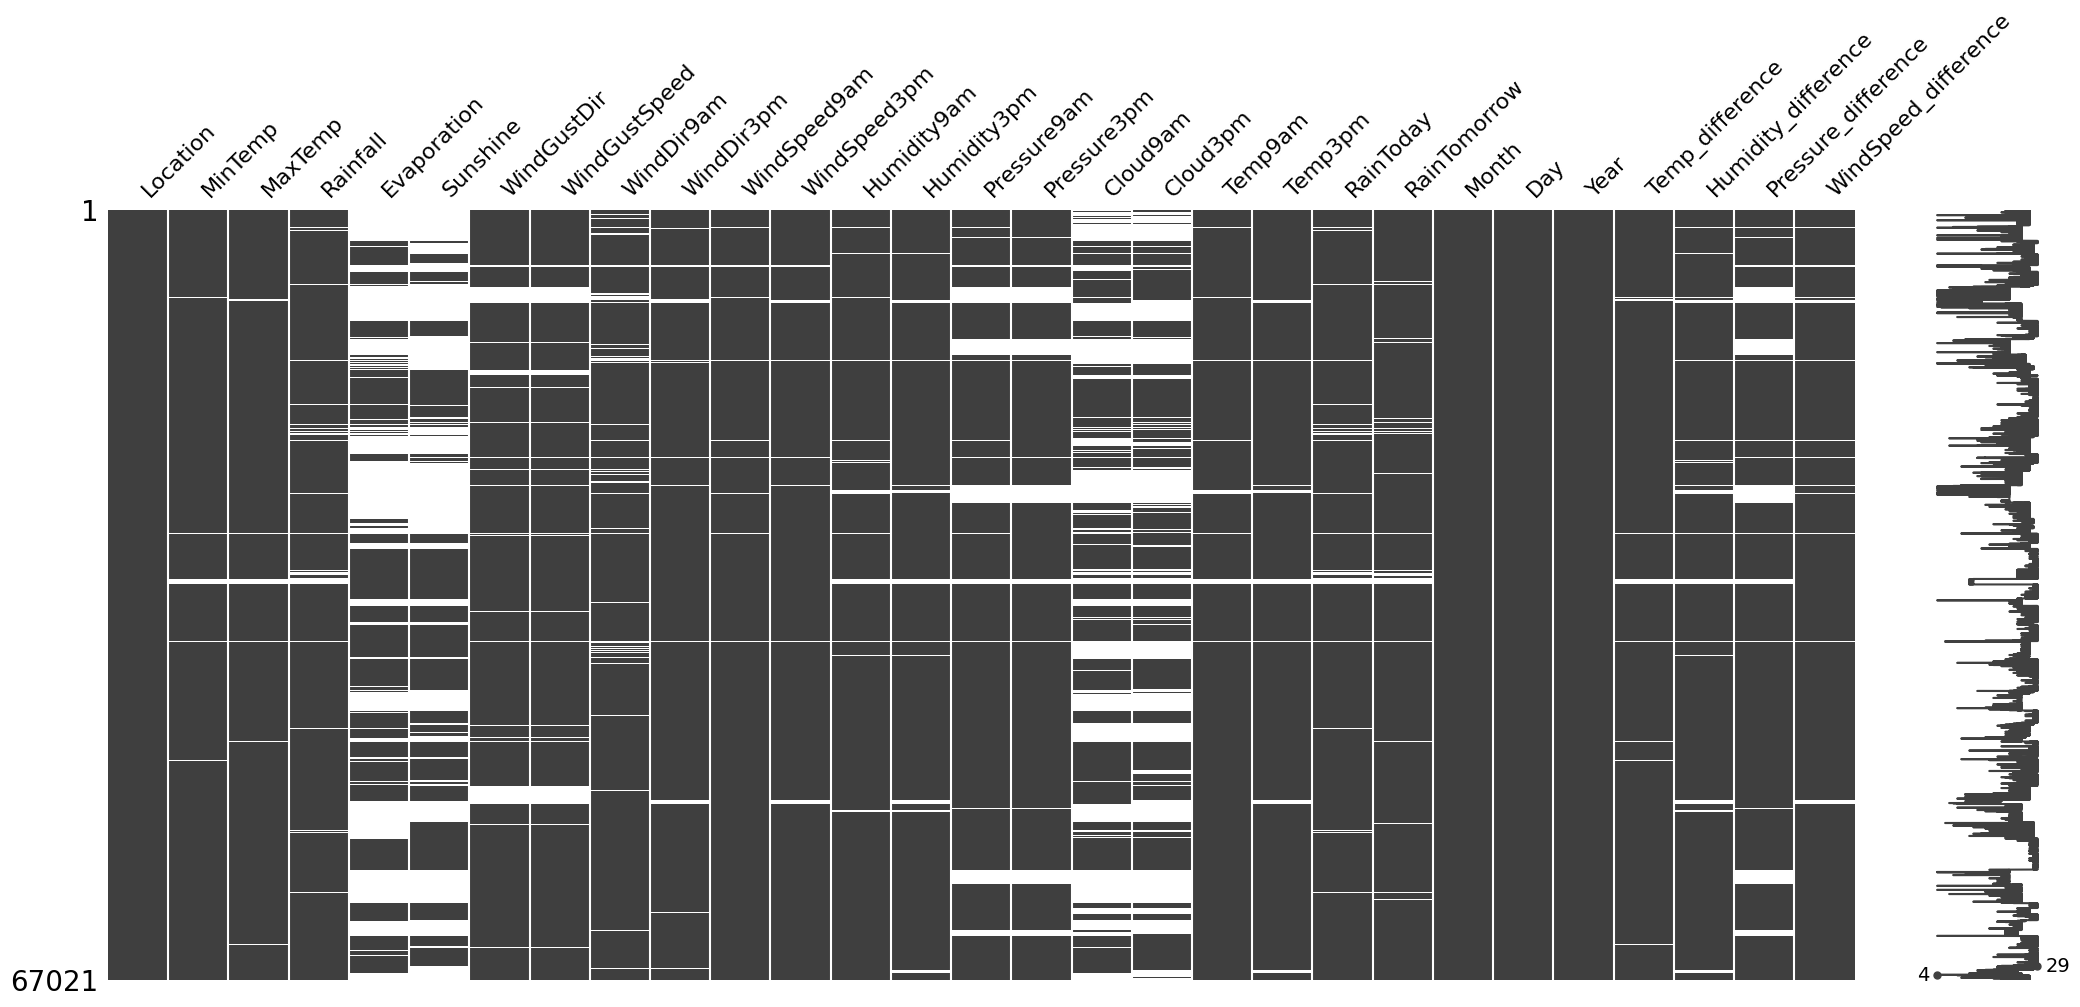

In [6]:
import missingno as msno

# Visualize the missing values as a matrix

msno.matrix(rain_data)

def create_missing_data_frame(data):
    # Create a table with data missing 
    missing_values=data.isnull().sum() # missing values

    percent_missing = data.isnull().sum()/data.shape[0]*100 # missing value %

    value = {
        'missing_values ':missing_values,
        'percent_missing %':percent_missing , 
        'data type' : data.dtypes
    }
    frame=pd.DataFrame(value)
    return frame

missing_data=create_missing_data_frame(rain_data)
missing_data

### DELETE SOME MISSING VALUES

Shape of the data: (53362, 29)


,missing_values,percent_missing %,data type
Location,0,0.000000,object
MinTemp,874,1.637870,float64
MaxTemp,861,1.613508,float64
Rainfall,1989,3.727372,float64
Evaporation,15771,29.554739,float64
Sunshine,18531,34.726959,float64
WindGustDir,4096,7.675874,object
WindGustSpeed,4068,7.623402,float64
WindDir9am,3180,5.959297,object
WindDir3pm,1492,2.795997,object


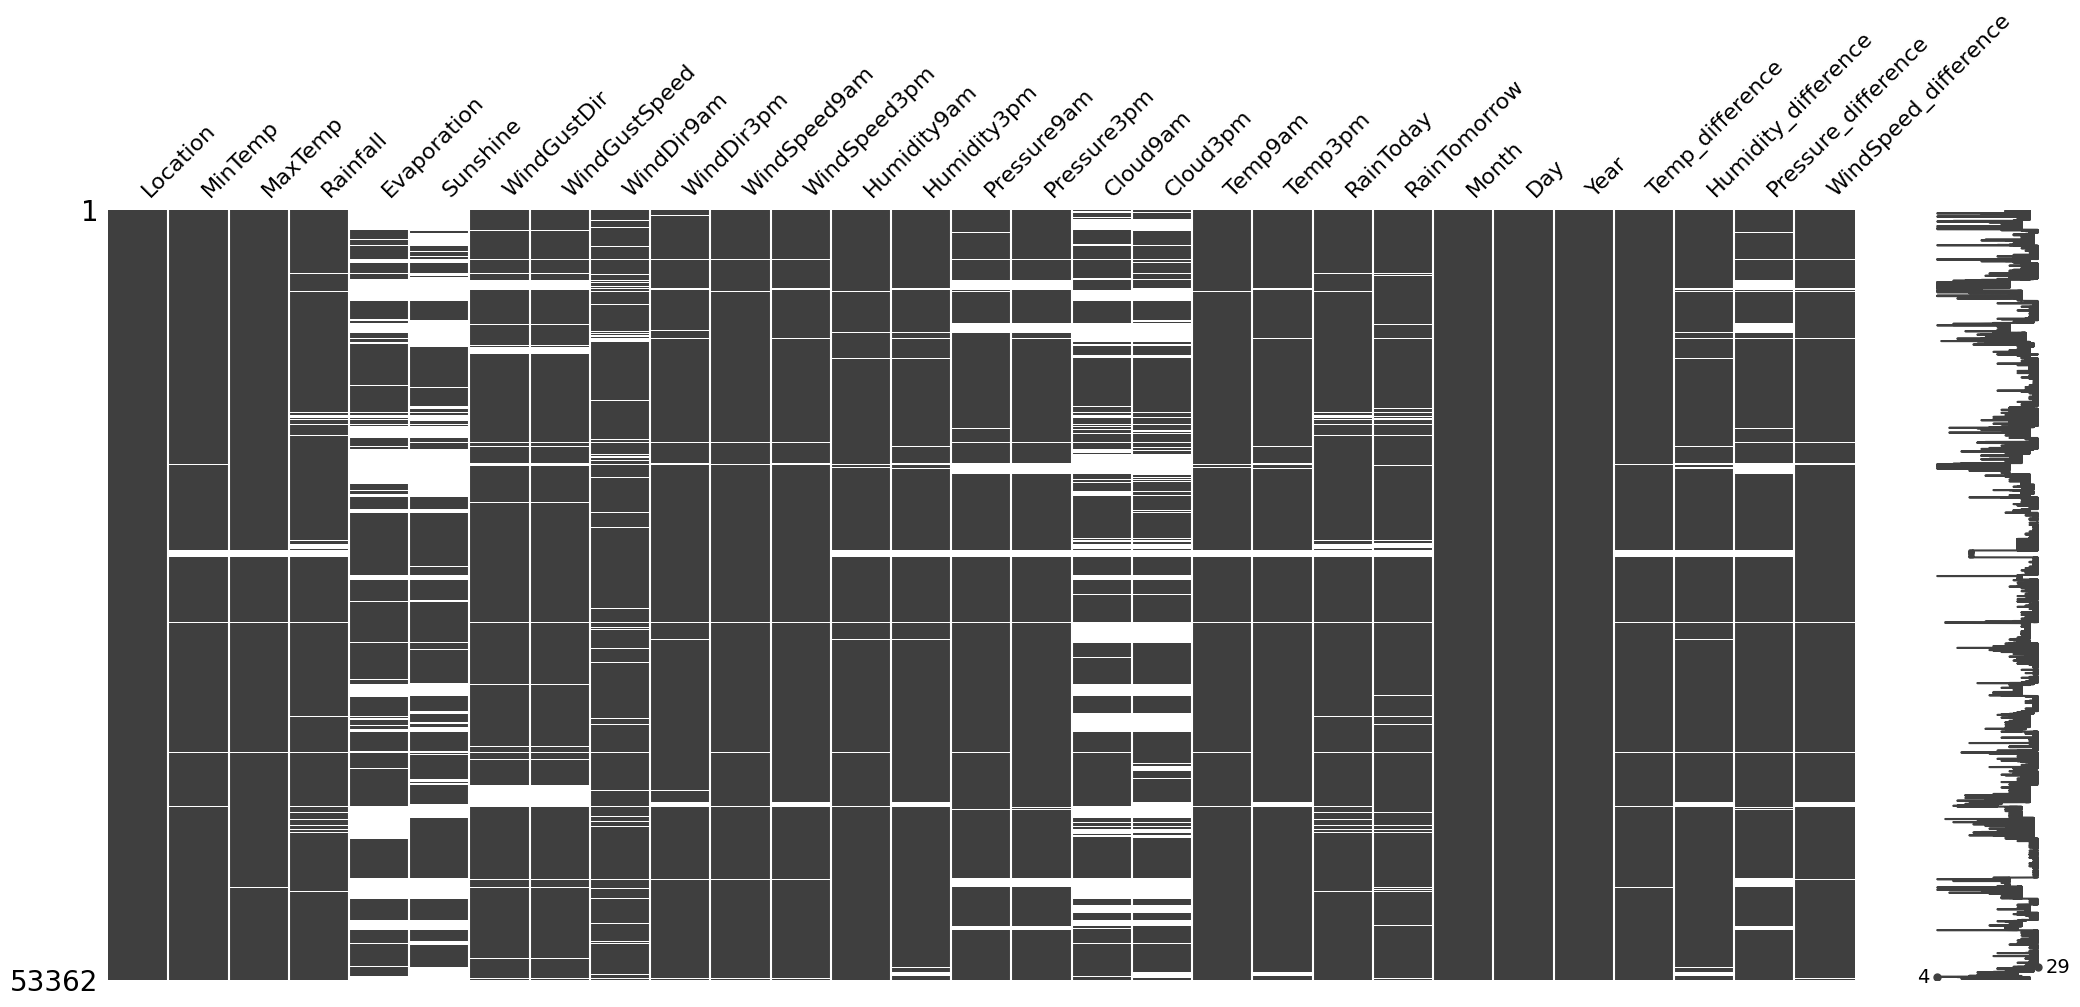

In [7]:
# Find the rows with missing values in the variables Evaporation and Sunshine

mask = rain_data['Evaporation'].isna() & rain_data['Sunshine'].isna()

# Select the indexes of the rows with missing values
indices_with_na = rain_data[mask].index

# Calculate the number of rows to remove
num_to_remove = int(0.5 * len(indices_with_na))

# Select randomly the indexes of the rows to remove
indices_to_remove = np.random.choice(indices_with_na, num_to_remove, replace=False)

# Delete the rows with missing values
rain_data.drop(indices_to_remove, inplace=True)

msno.matrix(rain_data)
missing_data = create_missing_data_frame(rain_data)
print(f'Shape of the data: {rain_data.shape}')
missing_data

# Impute the rest of values

In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

def impute_dataset(train_data, test_data):
    """
    Impute missing values in both training and test datasets.
    Args:
    train_data: DataFrame containing the training data.
    test_data: DataFrame containing the test data.
    
    Returns:
    train_imputed: Training data with imputed values.
    test_imputed: Test data with imputed values, using the same imputer as training.
    """
    # Separate the features into numerical and categorical
    categorical_cols = train_data.select_dtypes(include=['object']).columns
    numerical_cols = train_data.select_dtypes(exclude=['object']).columns
    
    # Create copies of the original dataframes to avoid changing the original data
    train_imputed = train_data.copy()
    test_imputed = test_data.copy()
    
    # Imputation for numerical variables using MICE with KNN
    mice_imputer = IterativeImputer(estimator=KNeighborsRegressor(), initial_strategy='median', max_iter=50, tol=0.01, random_state=42)
    train_imputed[numerical_cols] = mice_imputer.fit_transform(train_imputed[numerical_cols])
    test_imputed[numerical_cols] = mice_imputer.transform(test_imputed[numerical_cols])
    
    # Round Cloud9am and Cloud3pm after imputation for better interpretation
    cloud_cols = ['Cloud9am', 'Cloud3pm']
    for col in cloud_cols:
        train_imputed[col] = train_imputed[col].apply(lambda x: min(8, max(0, round(x))))
        test_imputed[col] = test_imputed[col].apply(lambda x: min(8, max(0, round(x))))
    
    # Imputation for categorical variables using Random Forest
    for column in categorical_cols:
        rf_imputer = RandomForestClassifier(n_estimators=100, random_state=42)
        if not train_imputed[train_imputed[column].notna()].empty:
            rf_imputer.fit(train_imputed[train_imputed[column].notna()].drop(columns=categorical_cols), train_imputed[train_imputed[column].notna()][column])
            
            # Impute training data if there are NaNs
            if train_imputed[column].isna().any():
                train_imputed.loc[train_imputed[column].isna(), column] = rf_imputer.predict(train_imputed[train_imputed[column].isna()].drop(columns=categorical_cols))
            
            # Impute test data if there are NaNs
            if test_imputed[column].isna().any():
                test_imputed.loc[test_imputed[column].isna(), column] = rf_imputer.predict(test_imputed[test_imputed[column].isna()].drop(columns=categorical_cols))

    
    return train_imputed, test_imputed

In [9]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, f1_score
from sklearn.model_selection import train_test_split

def hide_data(df, columns_to_exclude, hide_ratio=0.1):
    """
    Randomly hides data in the DataFrame based on the specified ratio,
    except for the specified columns.
    """
    df_copy = df.copy()
    mask = np.random.rand(*df.shape) < hide_ratio
    mask_df = pd.DataFrame(mask, columns=df.columns, index=df.index)
    mask_df[columns_to_exclude] = False
    df_copy[mask_df] = np.nan
    original_data = df.where(mask_df)
    return df_copy, original_data

def evaluate_imputation(train_data, test_data, hide_ratio=0.1):
    """
    Imputes hidden data in the test dataset using models trained on the train dataset
    and evaluates the imputation quality.
    """
    excluded_columns = ['Sunshine', 'Evaporation', 'Date', 'Location', 'Month', 'Day', 'Year']
    test_data_hidden, original_test_data = hide_data(test_data, excluded_columns, hide_ratio)
    
    # Ensure impute_dataset function is adjusted to train on train_data and transform test_data
    # This function should now properly separate the returned imputed train and test data
    _, test_data_imputed = impute_dataset(train_data, test_data_hidden)  # Assuming impute_dataset returns a tuple (train_imputed, test_imputed)
    
    metrics_num = {}
    metrics_cat = {}

    for column in test_data.columns:
        if column in excluded_columns:
            continue
        if test_data[column].dtype in ['float64', 'int64']:
            valid_index = original_test_data[column].dropna().index
            if not valid_index.empty:
                mse = mean_squared_error(original_test_data[column].loc[valid_index], test_data_imputed[column].loc[valid_index])
                r2 = r2_score(original_test_data[column].loc[valid_index], test_data_imputed[column].loc[valid_index])
                metrics_num[column] = {'MSE': mse, 'R2': r2}
        elif test_data[column].dtype == 'object':
            valid_index = original_test_data[column].dropna().index
            if not valid_index.empty:
                accuracy = accuracy_score(original_test_data[column].loc[valid_index], test_data_imputed[column].loc[valid_index])
                f1 = f1_score(original_test_data[column].loc[valid_index], test_data_imputed[column].loc[valid_index], average='weighted')
                metrics_cat[column] = {'Accuracy': accuracy, 'F1 Score': f1}
    
    return metrics_num, metrics_cat


# Use case example
train_data_example, test_data_example = train_test_split(rain_data, test_size=0.2, random_state=42)
metrics_num, metrics_cat = evaluate_imputation(train_data_example, test_data_example, hide_ratio=0.1)

# Convert the results to DataFrames for better visualization
df_metrics_num = pd.DataFrame(metrics_num).T
df_metrics_cat = pd.DataFrame(metrics_cat).T

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/impute/_iterative.py:796: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


## PRINT THE IMPUTATION RESULTS

In [10]:
# Print the results
print("Numerical Variables Imputation Metrics:")
df_metrics_num

Numerical Variables Imputation Metrics:


,MSE,R2
MinTemp,6.081217,0.844052
MaxTemp,4.202721,0.908575
Rainfall,79.833472,0.003698
WindGustSpeed,87.924346,0.578237
WindSpeed9am,19.922058,0.758598
WindSpeed3pm,17.893851,0.793601
Humidity9am,45.808964,0.872833
Humidity3pm,45.493043,0.904444
Pressure9am,14.150363,0.734244
Pressure3pm,13.890006,0.744580


In [11]:
print("Categorical Variables Imputation Metrics:")
df_metrics_cat

Categorical Variables Imputation Metrics:


,Accuracy,F1 Score
WindGustDir,0.204145,0.197803
WindDir9am,0.201375,0.190238
WindDir3pm,0.213748,0.206287
RainToday,0.961646,0.961898
RainTomorrow,0.784314,0.784314


# CREATING THE TRAINING AND TESTING DATASETS

In [12]:
from sklearn.model_selection import train_test_split

# Division of the dataset into training and test sets (including the target variable)
train_data, test_data = train_test_split(rain_data, test_size=0.3, random_state=42)

# Impute the dataset
train_data_imputed, test_data_imputed = impute_dataset(train_data, test_data)

# Separate the target variable from the features
y_train = train_data_imputed['RainTomorrow']
y_test = test_data_imputed['RainTomorrow']
X_train = train_data_imputed.drop('RainTomorrow', axis=1)
X_test = test_data_imputed.drop('RainTomorrow', axis=1)


# Change the target variable to binary
y_train = y_train.map({'No': 0, 'Yes': 1}).values
y_test = y_test.map({'No': 0, 'Yes': 1}).values

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/impute/_iterative.py:796: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


## Ensuring there are no missing values

Shape of the data: (37353, 28)


,missing_values,percent_missing %,data type
Location,0,0.0,object
MinTemp,0,0.0,float64
MaxTemp,0,0.0,float64
Rainfall,0,0.0,float64
Evaporation,0,0.0,float64
Sunshine,0,0.0,float64
WindGustDir,0,0.0,object
WindGustSpeed,0,0.0,float64
WindDir9am,0,0.0,object
WindDir3pm,0,0.0,object


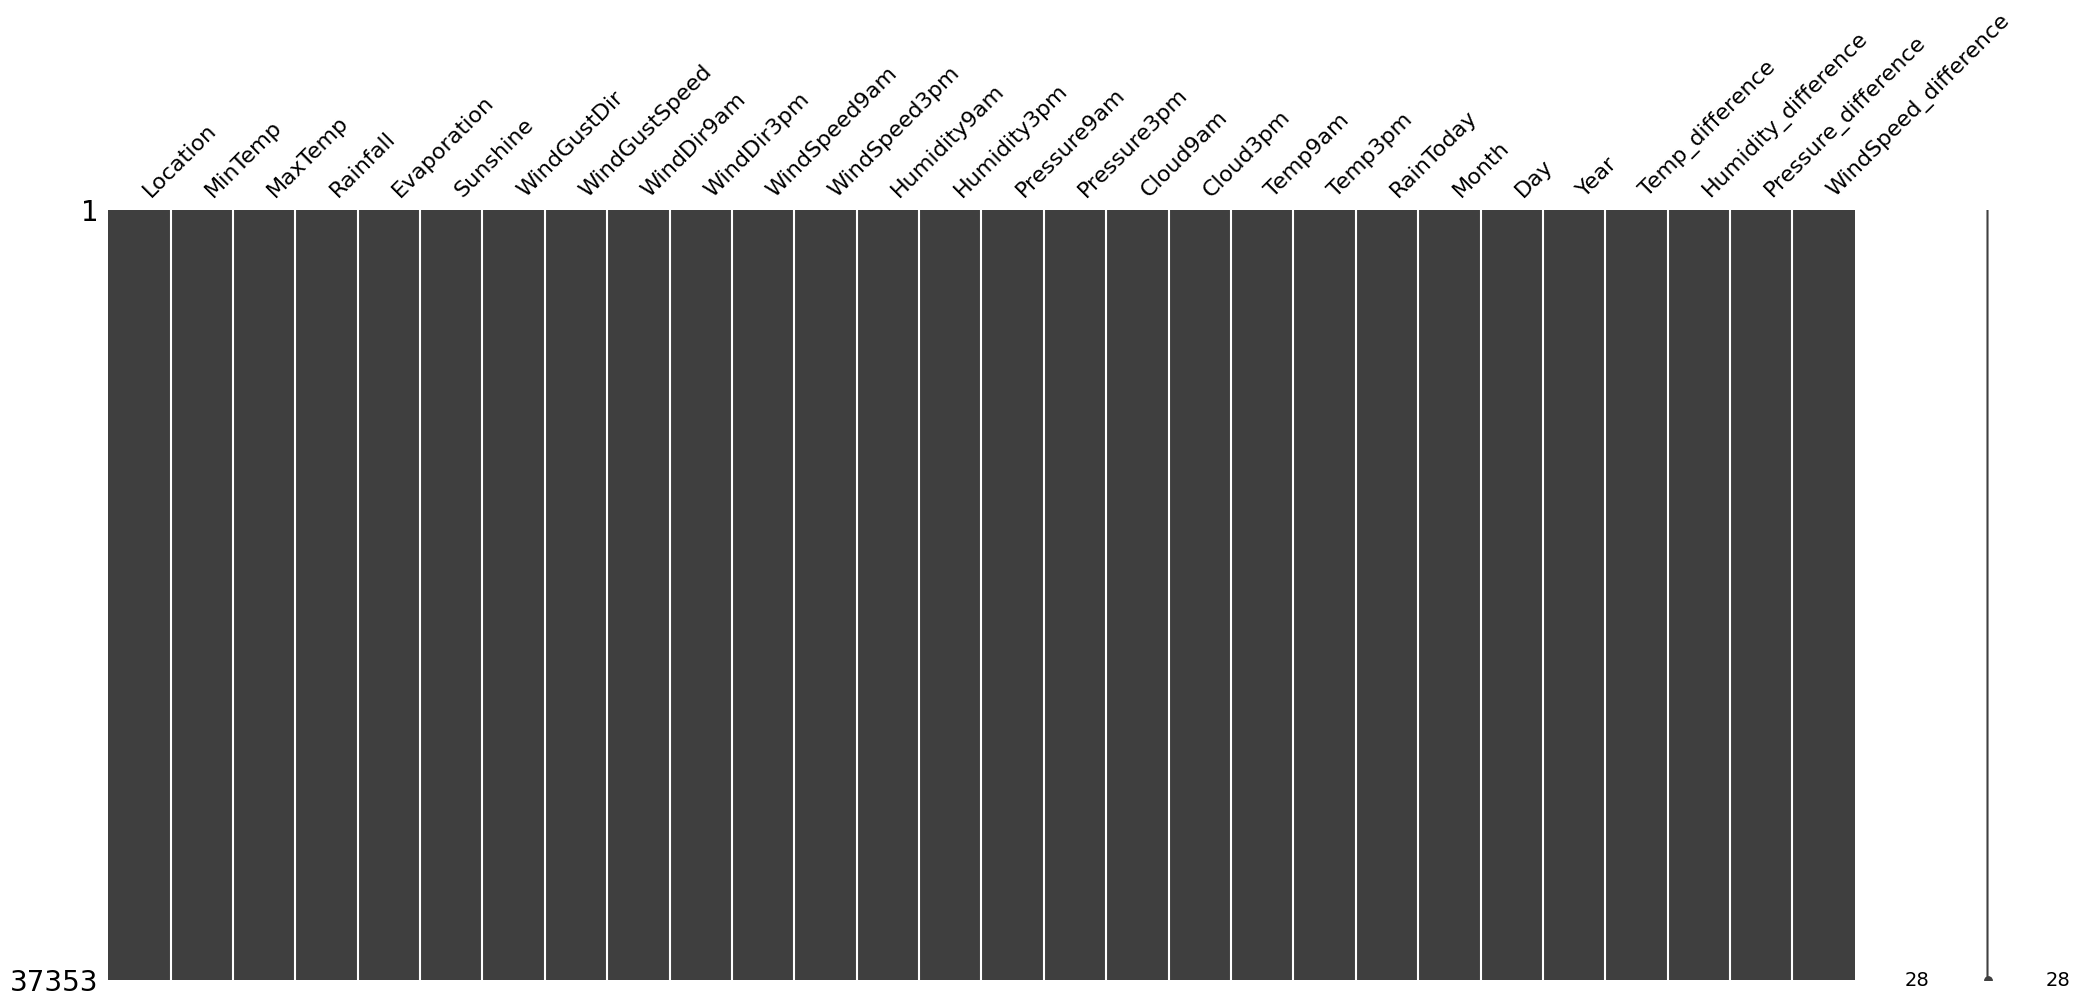

In [13]:
missing_data = create_missing_data_frame(X_train)
msno.matrix(X_train)
print(f'Shape of the data: {X_train.shape}')
missing_data

# CHECKING THE DISTRIBUTIONS CHANGES OF THE IMPUTATION

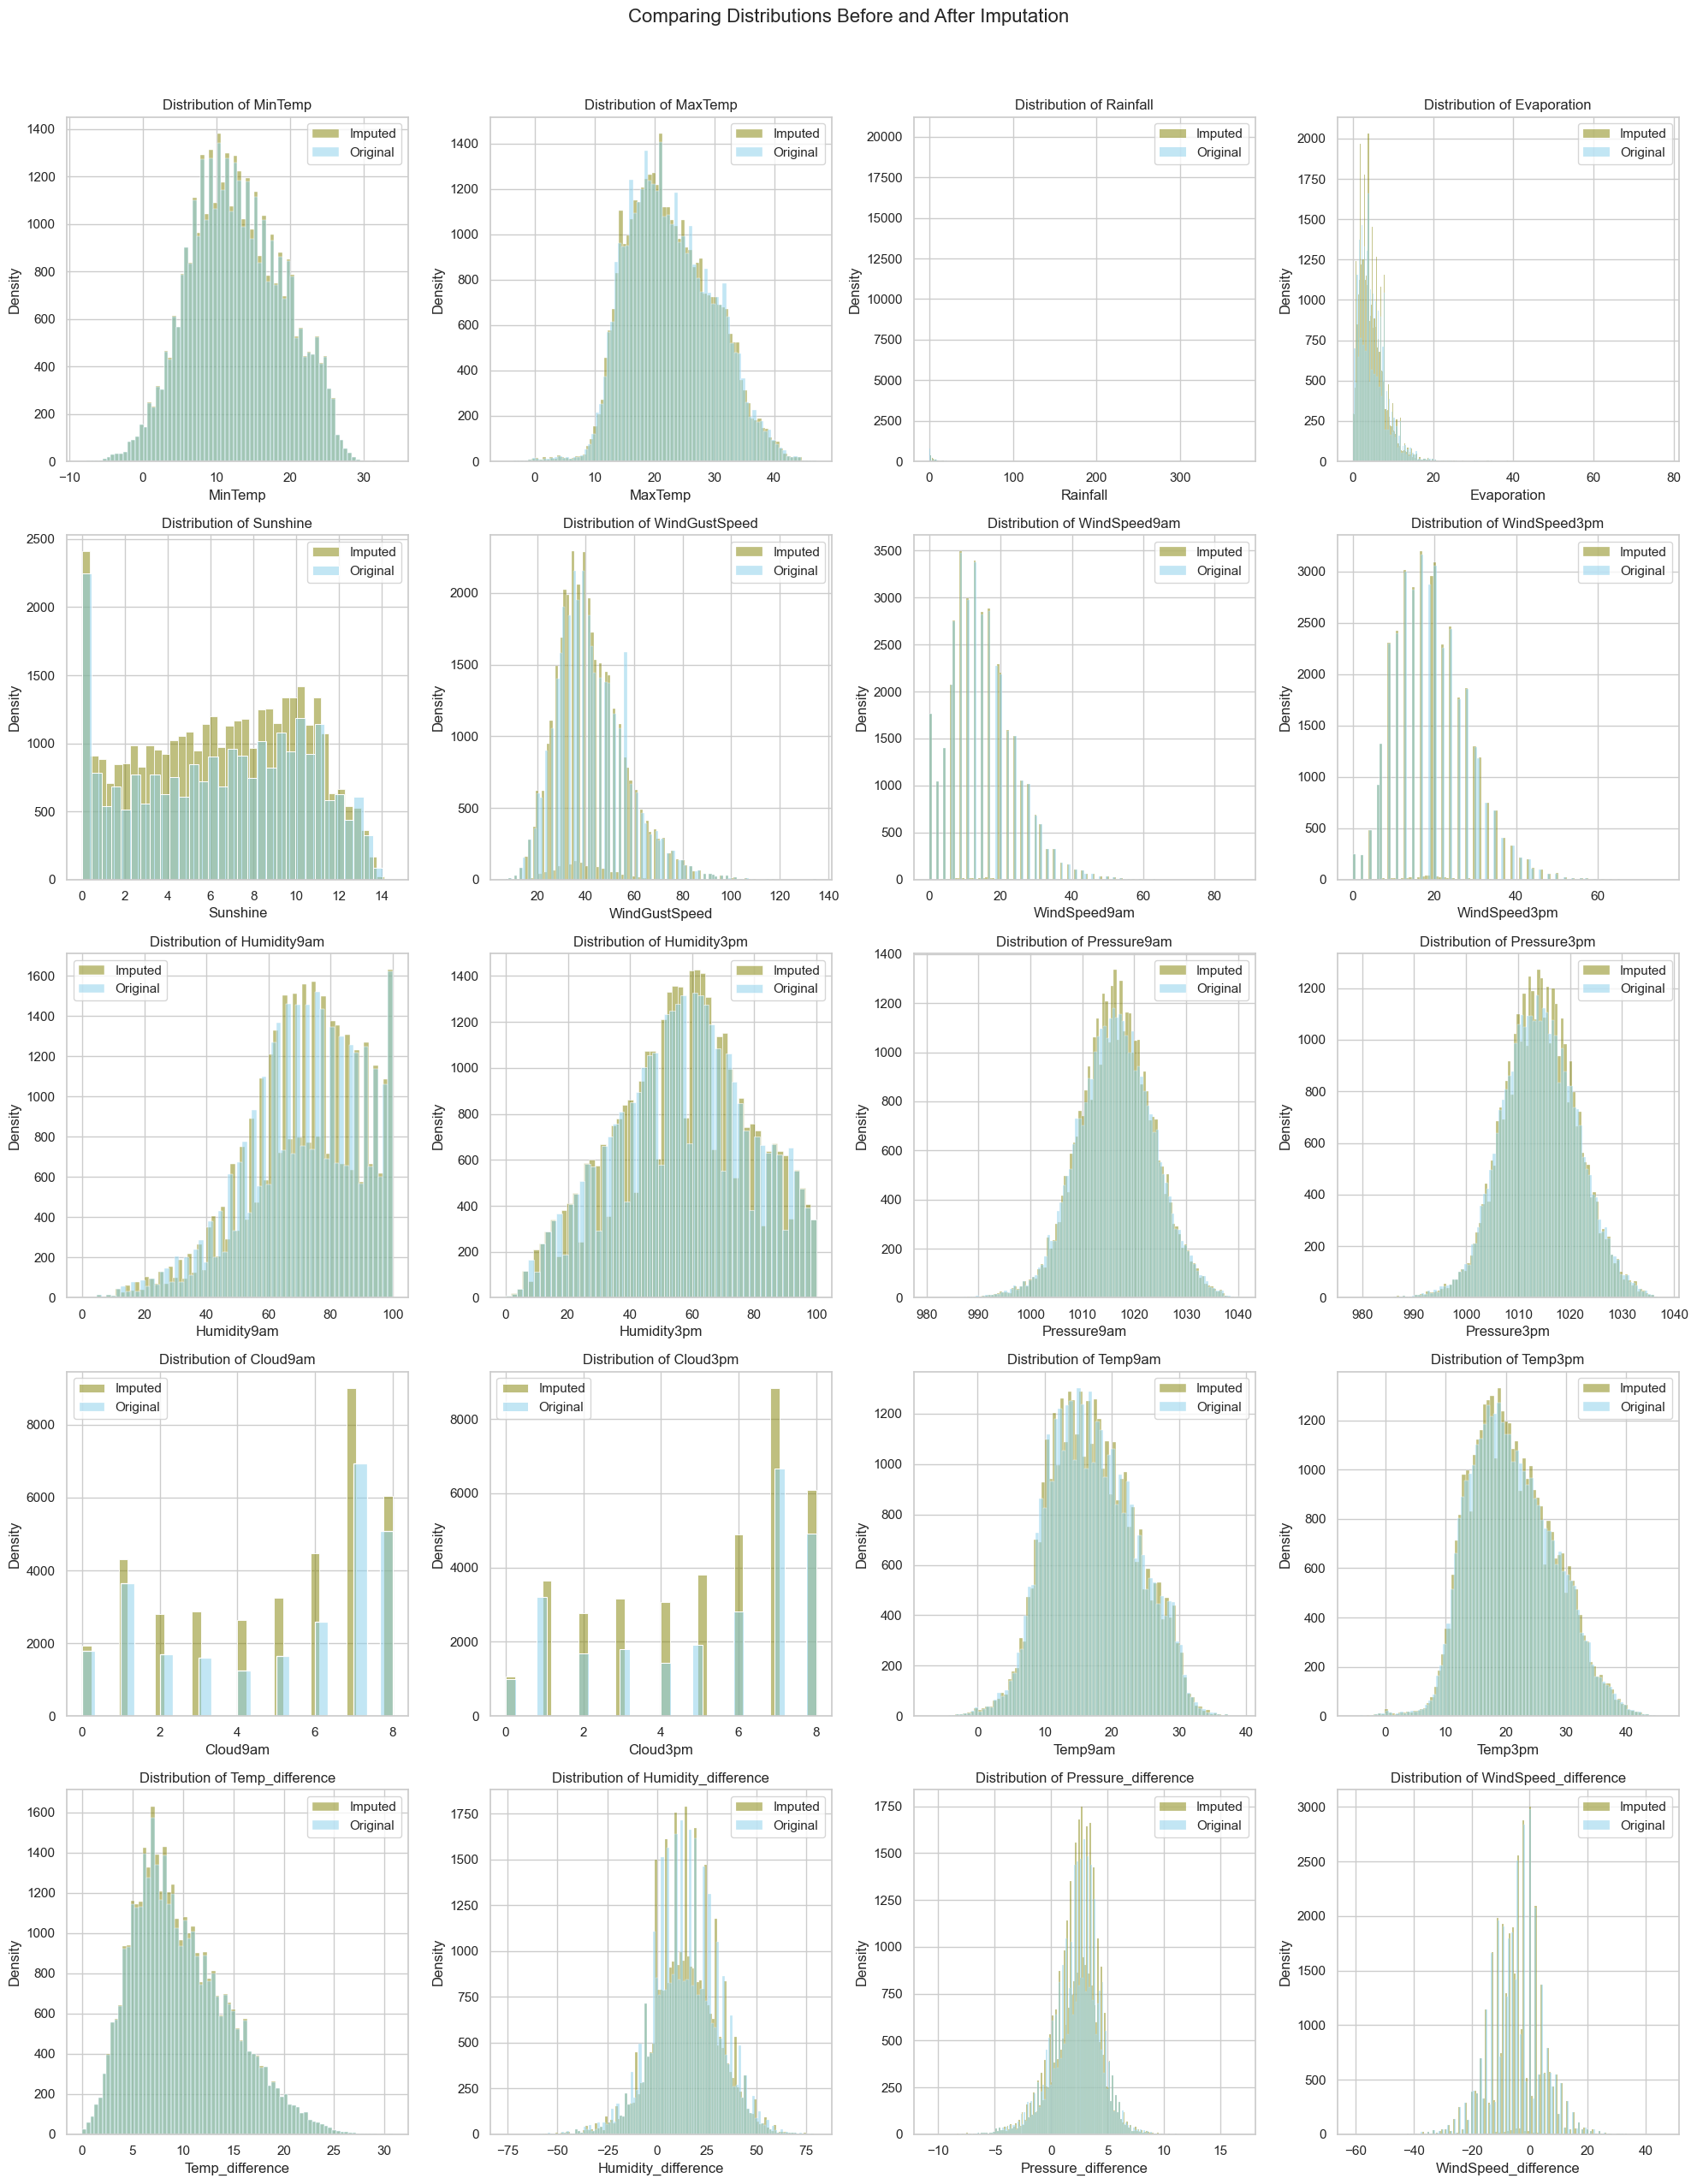

In [14]:
# Configuration of seaborn aesthetics for the plots
sns.set(style="whitegrid")


def compare_distributions(original_df, imputed_df):
    numerical_cols = original_df.select_dtypes(include=['int64', 'float64']).columns
    n_cols = len(numerical_cols)
    n_rows = max(n_cols // 4, 1)
    fig, axes = plt.subplots(nrows=n_rows, ncols=4, figsize=(20, 5 * n_rows))  # Adjust the size of the plot
    fig.suptitle('Comparing Distributions Before and After Imputation', fontsize=16, y=1.02)

    axes = axes.flatten()  # Flatten the 2D array of subplots

    # Iterate over the numerical columns and plot the distributions
    for ax, column in zip(axes, numerical_cols):
        sns.histplot(imputed_df[column], kde=False, color="olive", alpha=0.5, label='Imputed', ax=ax)
        sns.histplot(original_df[column], kde=False, color="skyblue", alpha=0.5, label='Original', ax=ax)
        ax.set_title(f'Distribution of {column}')
        ax.set_xlabel(column)
        ax.set_ylabel('Density')
        ax.legend()
    
    # Hide the empty subplots
    for i in range(len(numerical_cols), len(axes)):
        axes[i].axis('off')
    
    plt.tight_layout()
    plt.show()

# Compare the distributions of the original and imputed data
compare_distributions(train_data.drop('RainTomorrow', axis=1), X_train)

# TRAINING LOGISTIC REGRESSION MODELS

In [20]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, confusion_matrix


# Selection of the categorical and numerical columns
categorical_cols = X_train.select_dtypes(include=['object', 'category']).columns
numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns

# Creation of the preprocessor with the StandardScaler for numerical variables and OneHotEncoder for categorical variables
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ])

# Logistic Regression model

# Define the hyperparameters to tune
param_grid_lr = {
    'classifier__solver': ['liblinear'],
    'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'classifier__max_iter': [350, 500, 1000],
    'classifier__penalty': ['l1', 'l2'],
}

# Create the Logistic Regression model
LR_model = LogisticRegression(random_state=42)

# Define the pipeline in order to include the preprocessor and the classifier

pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                            ('classifier', LR_model)])

# Setup GridSearchCV
grid_search_lr = GridSearchCV(
    estimator=pipeline, 
    param_grid=param_grid_lr, 
    cv=5,  # Number of cross-validation folds
    scoring='accuracy', 
    verbose=1  # For detailed logging information
)

# Fit GridSearchCV
grid_search_lr.fit(X_train, y_train)

# Best model's parameters
best_params_lr = grid_search_lr.best_params_
print("Best parameters:", best_params_lr)

# Best model
best_model = grid_search_lr.best_estimator_

# Predictions with the best model
y_pred = best_model.predict(X_test)
y_prob = best_model.predict_proba(X_test)[:, 1]

accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)
f1 = f1_score(y_test, y_pred)

print(f"Logistic Regression:\n Accuracy: {accuracy:.4f}, ROC AUC: {roc_auc:.2f}", f", F1 Score: {f1:.2f}\n")

Fitting 5 folds for each of 42 candidates, totalling 210 fits
Best parameters: {'classifier__C': 0.1, 'classifier__max_iter': 350, 'classifier__penalty': 'l1', 'classifier__solver': 'liblinear'}
Logistic Regression:
 Accuracy: 0.7941, ROC AUC: 0.88 , F1 Score: 0.79



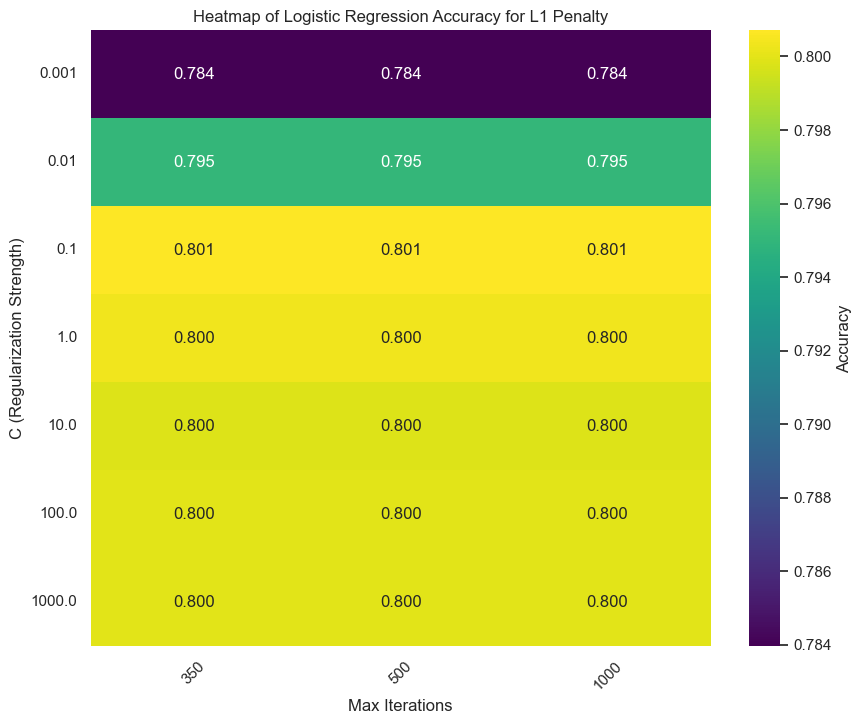

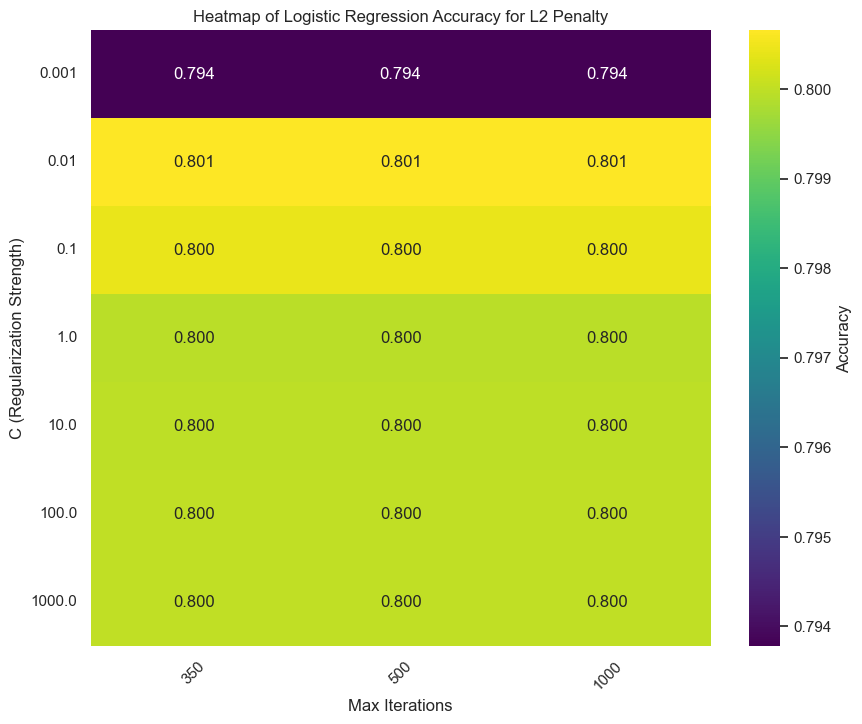

In [22]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

# Extract the results into a DataFrame
results = pd.DataFrame(grid_search_lr.cv_results_)

# Filter the results for each penalty type
results_l1 = results[results['param_classifier__penalty'] == 'l1']
results_l2 = results[results['param_classifier__penalty'] == 'l2']


def plot_accuracy_heatmap_combinations(results, title):
    # Pivot the DataFrame to create a matrix where rows are C values, columns are max_iter, and cells are accuracies
    results_pivot = results.pivot(index="param_classifier__C", columns="param_classifier__max_iter", values="mean_test_score")
    
    plt.figure(figsize=(10, 8))
    sns.heatmap(results_pivot, annot=True, fmt=".3f", cmap='viridis', cbar_kws={'label': 'Accuracy'})
    plt.title(title)
    plt.xlabel('Max Iterations')
    plt.ylabel('C (Regularization Strength)')
    plt.xticks(rotation=45)
    plt.yticks(rotation=0)
    plt.show()


# Plot heatmap for L1 Penalty
plot_accuracy_heatmap_combinations(results_l1, 'Heatmap of Logistic Regression Accuracy for L1 Penalty')

# Plot heatmap for L2 Penalty
plot_accuracy_heatmap_combinations(results_l2, 'Heatmap of Logistic Regression Accuracy for L2 Penalty')



# TRAINING NN MODELS

In [16]:
import numpy as np
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Activation
from tensorflow.keras.optimizers import legacy  # Use legacy optimizer if required
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

def train_and_visualize_nn(model, X_train, y_train, X_test, y_test, epochs=100, batch_size=32, validation_split=0.2, use_early_stopping=False):
    """
    Trains a neural network model, evaluates it on the test set, and visualizes the training process and results.
    """
    callbacks = []
    if use_early_stopping:
        early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
        callbacks.append(early_stopping)
    
    history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size,
                        validation_split=validation_split, callbacks=callbacks, verbose=1)
    
    # Evaluating the model on the test set
    y_pred_prob = model.predict(X_test)
    y_pred = (y_pred_prob > 0.5).astype(int)
    test_accuracy = accuracy_score(y_test, y_pred)
    test_f1_score = f1_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)

    print(f"Test Accuracy: {test_accuracy:.4f}")
    print(f"Test F1-Score: {test_f1_score:.4f}")

    # Plotting accuracy and loss
    plt.figure(figsize=(24, 6))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(loc='upper left')

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(loc='upper left')

    plt.show()

    # Plot the confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap='Blues', xticklabels=['Not Rain', 'Rain'], yticklabels=['Not Rain', 'Rain'])
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')
    plt.show()

    return model, history



# Transforming the data using the preprocessor and converting it to a numpy array
pipeline = Pipeline(steps=[('preprocessor', preprocessor)])
X_train_transformed = pipeline.fit_transform(X_train).toarray()
X_test_transformed = pipeline.transform(X_test).toarray()


## NN with only one layer and SIGMOID activation function
This is the same as training a Logistic Regression model of sklearn with a different optimizer

Epoch 1/250
374/374 [==============================] - 0s 542us/step - loss: 0.7320 - accuracy: 0.5073 - val_loss: 0.5920 - val_accuracy: 0.7074
Epoch 2/250
374/374 [==============================] - 0s 357us/step - loss: 0.5298 - accuracy: 0.7518 - val_loss: 0.5058 - val_accuracy: 0.7597
Epoch 3/250
374/374 [==============================] - 0s 350us/step - loss: 0.4795 - accuracy: 0.7742 - val_loss: 0.4775 - val_accuracy: 0.7715
Epoch 4/250
374/374 [==============================] - 0s 343us/step - loss: 0.4606 - accuracy: 0.7832 - val_loss: 0.4644 - val_accuracy: 0.7781
Epoch 5/250
374/374 [==============================] - 0s 341us/step - loss: 0.4512 - accuracy: 0.7882 - val_loss: 0.4568 - val_accuracy: 0.7833
Epoch 6/250
374/374 [==============================] - 0s 356us/step - loss: 0.4455 - accuracy: 0.7920 - val_loss: 0.4518 - val_accuracy: 0.7873
Epoch 7/250
374/374 [==============================] - 0s 616us/step - loss: 0.4416 - accuracy: 0.7939 - val_loss: 0.4481 - val_ac

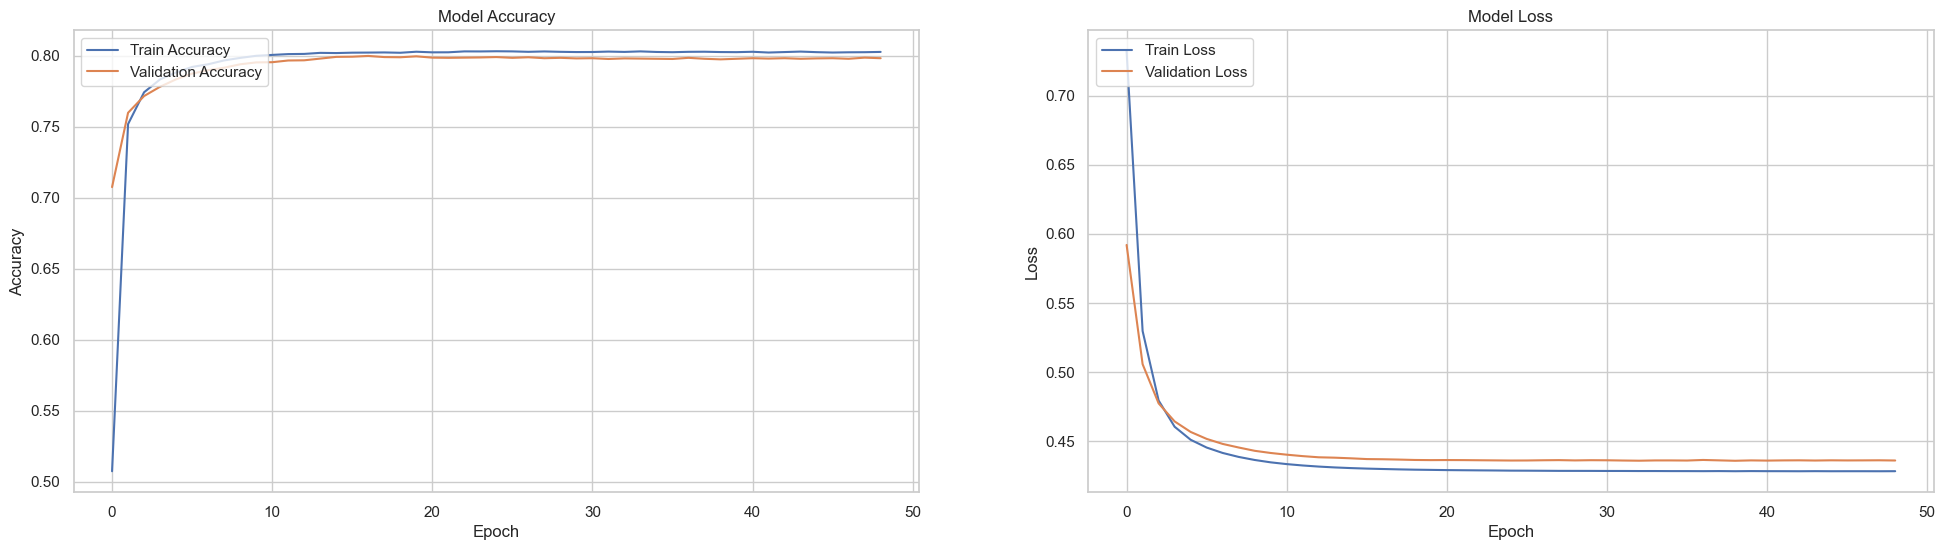

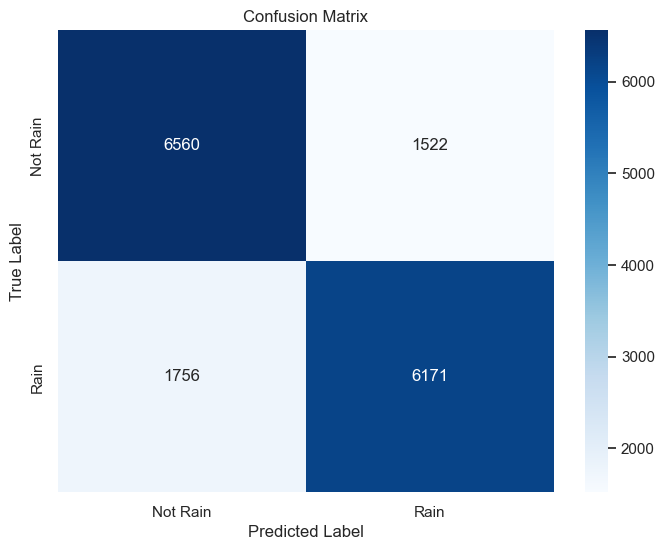

In [17]:
# Build and compile the neural network model wih only one layer and sigmoid activation function

model = Sequential([Dense(1, activation='sigmoid')])
model.compile(optimizer=legacy.Adam(learning_rate=0.0005),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train and visualize the model
model, history = train_and_visualize_nn(model, X_train_transformed, y_train, X_test_transformed, y_test, epochs=250, batch_size=80, use_early_stopping=True)

## More complex NN structure

Epoch 1/250
200/200 [==============================] - 1s 2ms/step - loss: 1.2024 - accuracy: 0.6846 - val_loss: 1.0082 - val_accuracy: 0.7779
Epoch 2/250
200/200 [==============================] - 0s 2ms/step - loss: 1.0092 - accuracy: 0.7566 - val_loss: 0.9030 - val_accuracy: 0.7872
Epoch 3/250
200/200 [==============================] - 0s 2ms/step - loss: 0.8995 - accuracy: 0.7734 - val_loss: 0.8190 - val_accuracy: 0.7916
Epoch 4/250
200/200 [==============================] - 0s 2ms/step - loss: 0.8077 - accuracy: 0.7830 - val_loss: 0.7483 - val_accuracy: 0.7965
Epoch 5/250
200/200 [==============================] - 0s 2ms/step - loss: 0.7390 - accuracy: 0.7888 - val_loss: 0.6887 - val_accuracy: 0.7979
Epoch 6/250
200/200 [==============================] - 0s 2ms/step - loss: 0.6802 - accuracy: 0.7934 - val_loss: 0.6396 - val_accuracy: 0.8002
Epoch 7/250
200/200 [==============================] - 0s 2ms/step - loss: 0.6343 - accuracy: 0.7963 - val_loss: 0.5995 - val_accuracy: 0.8035

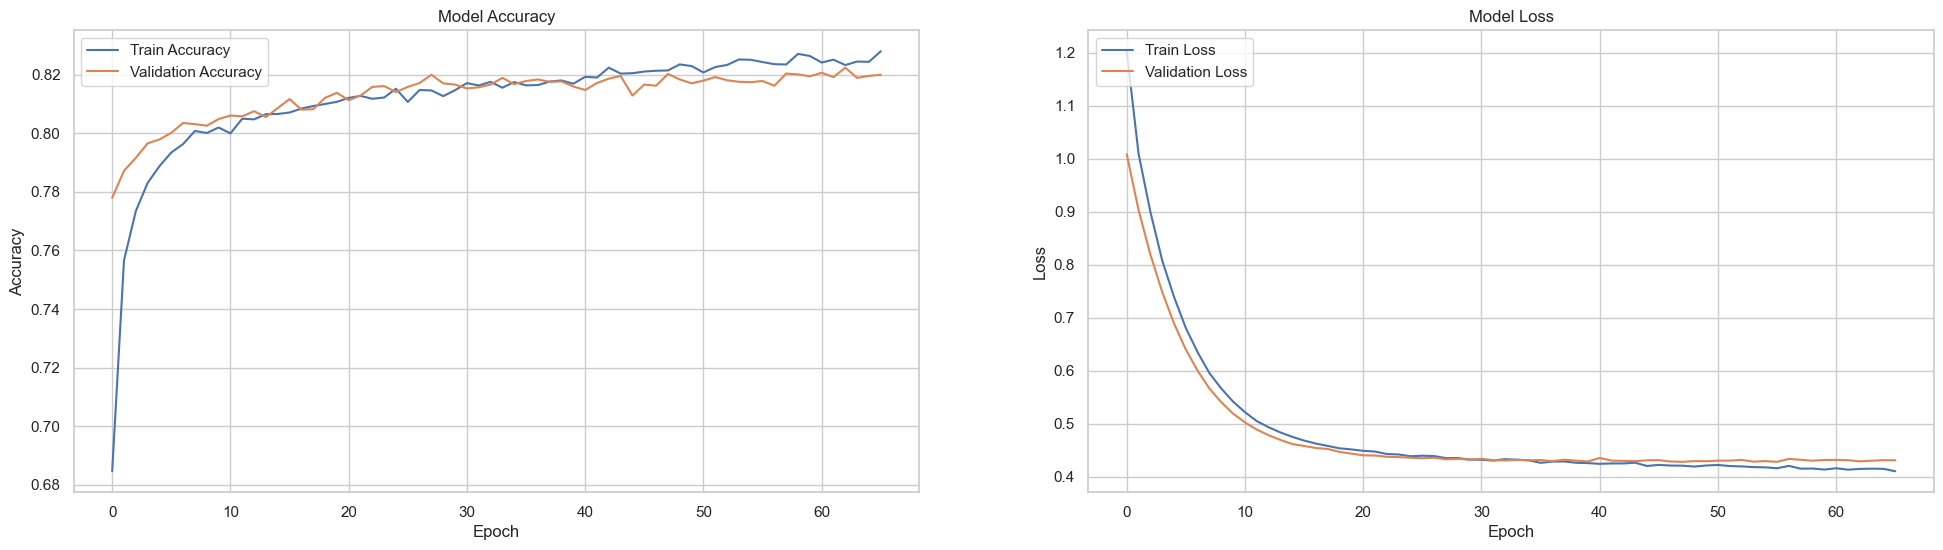

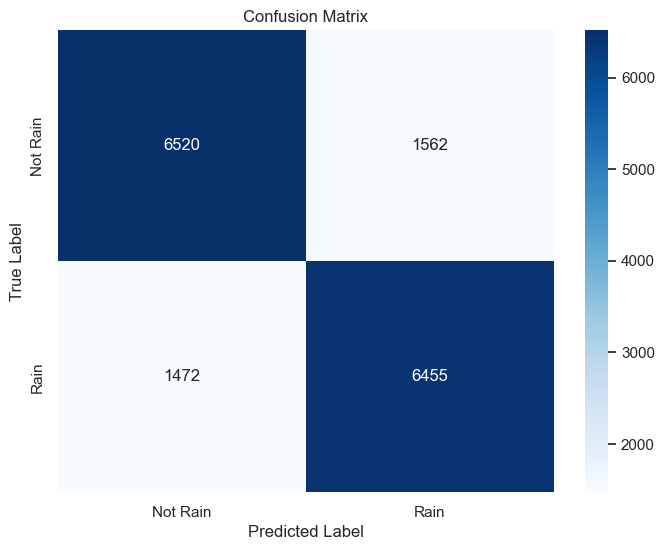

In [18]:
# Configuration of the neural network model

from tensorflow.keras.regularizers import l2

def build_model(input_dim):
    model = Sequential([
        Dense(128, input_dim=input_dim, kernel_initializer='he_uniform', kernel_regularizer=l2(0.001)),
        BatchNormalization(),
        Activation('relu'),
        Dropout(0.5),
        Dense(128, kernel_initializer='he_uniform', kernel_regularizer=l2(0.001)),
        BatchNormalization(),
        Activation('relu'),
        Dropout(0.5),
        Dense(64, kernel_initializer='he_uniform', kernel_regularizer=l2(0.001)),
        BatchNormalization(),
        Activation('relu'),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ])
    return model

# Build and compile the model
model = build_model(X_train_transformed.shape[1])
model.compile(optimizer=legacy.Adam(learning_rate=0.0005),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train and visualize the model
model, history = train_and_visualize_nn(model, X_train_transformed, y_train, X_test_transformed, y_test, epochs=250, batch_size=150, use_early_stopping=True)